In [1]:
%matplotlib notebook
from ipywidgets import *
import numpy as np
import matplotlib.pyplot as plt
from DataGenerationRadar1D import GenerateData,rangeAccuracy,velocityAccuracy
from KalmanFilter import KalmanFilter
from ui import *

[[0.005 0.01  0.01 ]
 [0.01  0.02  0.02 ]
 [0.01  0.02  0.02 ]]


<IPython.core.display.Javascript object>


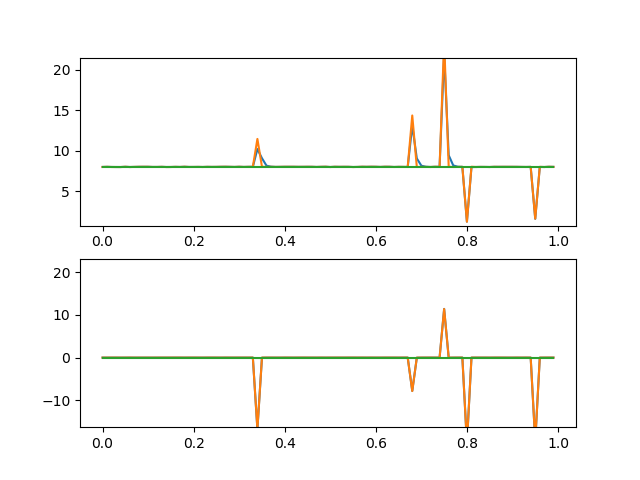

Output()

Output()

In [2]:
plot_interactive_kalaman_filter()